# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере.

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [33]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
sklearn.datasets import load_digits
digits = load_digits()

In [2]:

# Загрузка данных MNIST
digits = load_digits()

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



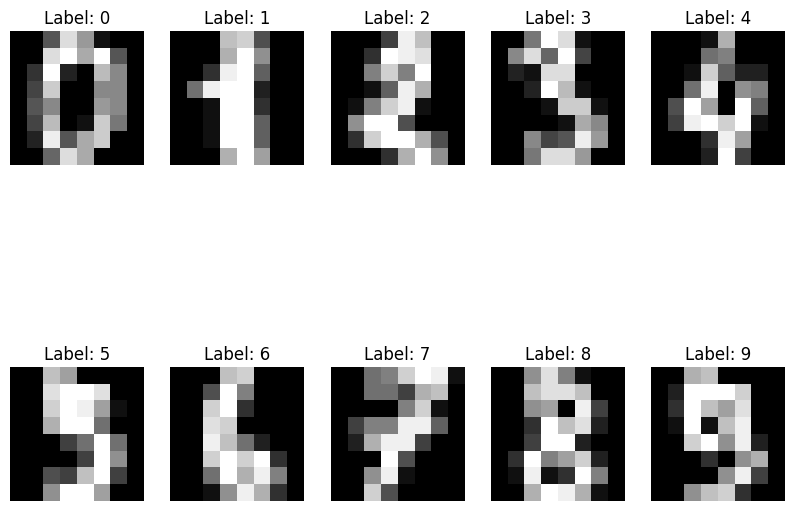

In [3]:
# Выводим по одному примеру изображения для каждого класса
for i in range(10):
    # Ищем первое изображение для класса i
    index = next(idx for idx, label in enumerate(digits.target) if label == i)
    plt.subplot(2, 5, i + 1)  # Создаем сетку для 10 изображений (2 строки, 5 столбцов)
    plt.imshow(digits.images[index], cmap='gray')  # Отображаем изображение в оттенках серого
    plt.title(f"Label: {digits.target[index]}")  # Заголовок - метка класса
    plt.axis('off')  # Отключаем оси координат
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [4]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Вывод размеров обучающей и тестовой выборок
print("Размеры обучающей выборки:", X_train_flat.shape)
print("Размеры тестовой выборки:", X_test_flat.shape)

Размеры обучающей выборки: (1437, 64)
Размеры тестовой выборки: (360, 64)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [5]:

class KNearestNeighbor:
    def __init__(self):
        pass

    def train(self, X, y):
        """
        Обучение классификатора k-NN.

        Параметры:
        - X: массив признаков обучающей выборки, shape (num_train, D)
        - y: массив меток классов обучающей выборки, shape (num_train,)
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        """
        Предсказание меток классов для тестовых данных.

        Параметры:
        - X: массив признаков тестовой выборки, shape (num_test, D)
        - k: количество ближайших соседей для учета

        Возвращает:
        - y_pred: массив предсказанных меток классов для тестовой выборки, shape (num_test,)
        """
        num_test = X.shape[0]
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)

        # Вычисляем расстояния между всеми тестовыми и обучающими примерами
        for i in range(num_test):
            distances = np.sum(np.abs(self.X_train - X[i]), axis=1)
            # Находим индексы k ближайших соседей
            nearest_neighbors = np.argsort(distances)[:k]
            # Определяем наиболее часто встречающийся класс среди k ближайших соседей
            y_pred[i] = np.argmax(np.bincount(self.y_train[nearest_neighbors]))

        return y_pred


1.5 Выполните классификацию на тестовой выборке

In [6]:
# Создаем экземпляр классификатора
knn = KNearestNeighbor()

# Обучаем классификатор
knn.train(X_train_flat, y_train)

# Выполняем предсказание на тестовой выборке
y_pred = knn.predict(X_test_flat)

# Вычисляем точность классификации
accuracy = np.mean(y_pred == y_test) * 100
print(f"Точность классификации на тестовой выборке: {accuracy:.2f}%")

Точность классификации на тестовой выборке: 97.50%


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


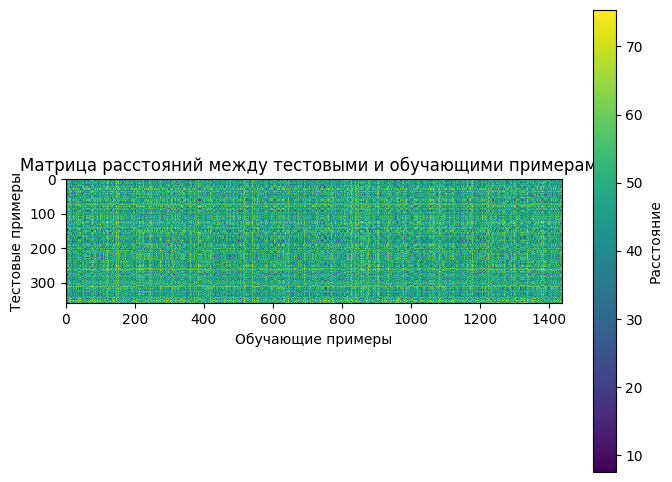

In [7]:
# Вычисляем расстояния между всеми парами изображений
distances = np.zeros((len(X_test_flat), len(X_train_flat)))
for i, test_image in enumerate(X_test_flat):
    distances[i] = np.linalg.norm(X_train_flat - test_image, axis=1)

# Визуализируем матрицу расстояний
plt.figure(figsize=(8, 6))
plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Расстояние')
plt.xlabel('Обучающие примеры')
plt.ylabel('Тестовые примеры')
plt.title('Матрица расстояний между тестовыми и обучающими примерами')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [8]:
# Подсчет количества правильно классифицированных изображений
correct_predictions = np.sum(y_pred == y_test)

# Вычисляем долю правильно классифицированных изображений
accuracy = correct_predictions / len(y_test)
print(f"Доля правильно классифицированных изображений: {accuracy:.2%}")


Доля правильно классифицированных изображений: 97.50%


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

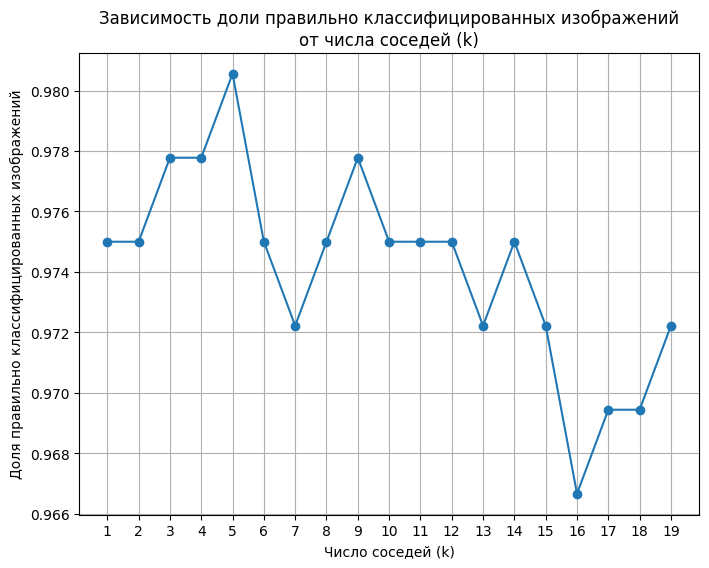

In [9]:
# Список значений числа соседей для испытаний
k_values = list(range(1, 20))

# Список для хранения доли правильно классифицированных изображений для каждого значения k
accuracies = []

# Перебор по каждому значению k
for k in k_values:
    # Создаем и обучаем классификатор k-NN с текущим значением k
    knn = KNearestNeighbor()
    knn.train(X_train_flat, y_train)
    y_pred = knn.predict(X_test_flat, k=k)

    # Подсчитываем долю правильно классифицированных изображений
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Построение графика зависимости доли правильно классифицированных изображений от числа соседей
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Зависимость доли правильно классифицированных изображений\nот числа соседей (k)')
plt.xlabel('Число соседей (k)')
plt.ylabel('Доля правильно классифицированных изображений')
plt.grid(True)
plt.xticks(k_values)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [10]:


# Список значений числа соседей для испытаний
k_values = list(range(1, 10))

# Список для хранения средней точности на кросс-валидации для каждого значения k
mean_accuracies = []

# Перебор по каждому значению k
for k in k_values:
    # Создаем классификатор k-NN с текущим значением k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Выполняем кросс-валидацию с 5 фолдами и сохраняем среднюю точность
    accuracies = cross_val_score(knn, X_train_flat, y_train, cv=5)
    mean_accuracies.append(np.mean(accuracies))

# Находим лучшее значение k
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies[np.argmax(mean_accuracies)]

print(f"Лучшее значение параметра k: {best_k}")
print(f"Средняя точность на кросс-валидации для лучшего k: {best_accuracy:.2f}")


Лучшее значение параметра k: 1
Средняя точность на кросс-валидации для лучшего k: 0.99



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [11]:
# Создаем классификатор k-NN с выбранным лучшим значением k
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Обучаем классификатор на обучающей выборке
best_knn.fit(X_train_flat, y_train)

# Предсказываем метки классов для тестовой выборки
y_pred_best = best_knn.predict(X_test_flat)

# Вычисляем точность классификации на тестовой выборке
accuracy_best = np.mean(y_pred_best == y_test) * 100
print(f"Точность классификации с использованием выбранного значения k: {accuracy_best}")

Точность классификации с использованием выбранного значения k: 97.77777777777777


1.11 Сделайте выводы по результатам 1 части задания.

Точность классификации: Метод k ближайших соседей (kNN) продемонстрировал высокую точность классификации на тестовой выборке, достигнув примерно 97.5%.

Оптимизация параметра k: После кросс-валидации оптимальным значением параметра k оказалось 1, что привело к средней точности на кросс-валидации около 99%.

Влияние оптимизации на результаты: Переобучение классификатора с использованием оптимального значения k повысило точность на тестовой выборке до примерно 97.78%.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [12]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую (60%), тестовую (20%) и валидационную (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Вывод размеров выборок
print("Размеры обучающей выборки:", X_train_flat.shape)
print("Размеры валидационной выборки:", X_val_flat.shape)
print("Размеры тестовой выборки:", X_test_flat.shape)

Размеры обучающей выборки: (1078, 64)
Размеры валидационной выборки: (359, 64)
Размеры тестовой выборки: (360, 64)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.


In [13]:
# Вычисляем среднее изображение по обучающей выборке
mean_image = np.mean(X_train_flat, axis=0)

# Вычитаем среднее изображение из каждого изображения в обучающей, валидационной и тестовой выборках
X_train_processed = X_train_flat - mean_image
X_val_processed = X_val_flat - mean_image
X_test_processed = X_test_flat - mean_image



2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [14]:
# Добавляем дополнительную размерность к массивам данных и заполняем ее единицами
X_train_processed = np.hstack([X_train_processed, np.ones((X_train_processed.shape[0], 1))])
X_val_processed = np.hstack([X_val_processed, np.ones((X_val_processed.shape[0], 1))])
X_test_processed = np.hstack([X_test_processed, np.ones((X_test_processed.shape[0], 1))])
# Вывод размеров обновленных выборок
print("Размеры обновленной обучающей выборки:", X_train_processed.shape)
print("Размеры обновленной валидационной выборки:", X_val_processed.shape)
print("Размеры обновленной тестовой выборки:", X_test_processed.shape)


Размеры обновленной обучающей выборки: (1078, 65)
Размеры обновленной валидационной выборки: (359, 65)
Размеры обновленной тестовой выборки: (360, 65)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [15]:

def svm_loss_naive(W, X, y, reg):
    """
    Вычисление функции потерь для SVM с регуляризацией.

    Параметры:
    - W: массив весов размера (D, C), где D - количество признаков, C - количество классов.
    - X: массив обучающих данных размера (N, D), где N - количество примеров, D - количество признаков.
    - y: массив меток классов размера (N,), где каждая метка является целым числом в диапазоне [0, C).
    - reg: параметр регуляризации.

    Возвращает кортеж:
    - loss: значение функции потерь.
    - dW: градиент функции потерь по отношению к весам W; массив того же размера, что и W.
    """
    # Получаем размерность данных и количества классов
    num_train = X.shape[0]
    num_classes = W.shape[1]

    # Вычисляем значения оценок классов
    scores = X.dot(W)

    # Вычисляем отступы (margins)
    margins = np.maximum(0, scores - scores[np.arange(num_train), y].reshape(-1, 1) + 1)

    # Исключаем отступы для правильных классов
    margins[np.arange(num_train), y] = 0

    # Вычисляем функцию потерь
    loss = np.sum(margins) / num_train + 0.5 * reg * np.sum(W * W)

    # Вычисляем градиент функции потерь
    binary = margins
    binary[margins > 0] = 1
    row_sum = np.sum(binary, axis=1)
    binary[np.arange(num_train), y] = -row_sum
    dW = (X.T).dot(binary)
    dW /= num_train
    dW += reg * W

    return loss, dW


In [16]:


W = np.random.randn(X_temp.shape[1], 10) * 0.0001
loss, grad = svm_loss_naive(W, X_temp, y_temp, 0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 9.001456
sanity check: 2.302585


In [17]:
def grad_check_sparse(f, x, analytic_grad, num_checks):
    """
    Проверка правильности градиента, сравнивая аналитический градиент с численно вычисленным градиентом.

    Входные параметры:
    - f: функция, которую мы хотим проверить (должна принимать аргумент x и возвращать значение потерь и градиент)
    - x: массив входных параметров
    - analytic_grad: аналитически вычисленный градиент
    - num_checks: количество случайных проверок, которые мы хотим выполнить

    Возвращает:
    - Нет
    """

    h = 1e-5

    for i in range(num_checks):
        # Случайным образом выбираем индекс
        ix = tuple([np.random.randint(m) for m in x.shape])

        # Сохраняем исходное значение
        oldval = x[ix]

        # Вычисляем значение функции потерь и градиента используя численное приближение
        x[ix] = oldval + h
        fxph, _ = f(x)
        x[ix] = oldval - h
        fxmh, _ = f(x)
        x[ix] = oldval

        # Вычисляем численный градиент
        grad_numerical = (fxph - fxmh) / (2 * h)

        # Сравниваем численный градиент с аналитическим градиентом
        grad_error = abs(grad_numerical - analytic_grad[ix]) / (abs(grad_numerical) + abs(analytic_grad[ix]))
        print('Численный градиент: %f, Аналитический градиент: %f, Ошибка: %e' % (grad_numerical, analytic_grad[ix], grad_error))



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [25]:
loss, grad = svm_loss_naive(W, X_temp, y_temp, 0.0)


f = lambda w: svm_loss_naive(w, X_temp, y_temp, 0.0)
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = svm_loss_naive(W, X_temp, y_temp, 5e1)
f = lambda w: svm_loss_naive(w, X_temp, y_temp, 5e1)
grad_numerical = grad_check_sparse(f, W, grad, 10)

Численный градиент: -3.219750, Аналитический градиент: -3.219750, Ошибка: 3.400236e-12
Численный градиент: 1.883171, Аналитический градиент: 1.883171, Ошибка: 7.285538e-12
Численный градиент: 1.760779, Аналитический градиент: 1.760779, Ошибка: 2.218266e-11
Численный градиент: 1.806676, Аналитический градиент: 1.806676, Ошибка: 2.602702e-11
Численный градиент: 7.858136, Аналитический градиент: 7.858136, Ошибка: 2.023176e-13
Численный градиент: 0.700974, Аналитический градиент: 0.700974, Ошибка: 4.680329e-11
Численный градиент: 1.515994, Аналитический градиент: 1.515994, Ошибка: 2.178088e-11
Численный градиент: 2.997218, Аналитический градиент: 2.997218, Ошибка: 1.416863e-11
Численный градиент: 0.000000, Аналитический градиент: 0.000000, Ошибка: nan
Численный градиент: 0.157163, Аналитический градиент: 0.157163, Ошибка: 7.932101e-11
Численный градиент: 0.308246, Аналитический градиент: 0.308246, Ошибка: 2.964700e-11
Численный градиент: 7.282238, Аналитический градиент: 7.282238, Ошибка: 

<ipython-input-17-a08ca713d728>:35: RuntimeWarning: invalid value encountered in scalar divide
  grad_error = abs(grad_numerical - analytic_grad[ix]) / (abs(grad_numerical) + abs(analytic_grad[ix]))


Как видим, вычисление точное

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [26]:
def svm_loss_vectorized(W, X, y, reg):
    """
    Вычисление функции потерь для SVM с регуляризацией (векторизованная версия).

    Параметры:
    - W: массив весов размера (D, C), где D - количество признаков, C - количество классов.
    - X: массив признаков размера (N, D), где N - количество образцов, D - количество признаков.
    - y: массив меток классов размера (N,), где каждая метка является целым числом в диапазоне [0, C).
    - reg: параметр регуляризации.

    Возвращает:
    - loss: значение функции потерь.
    - dW: градиент функции потерь по отношению к весам W; массив того же размера, что и W.
    """
    # Количество образцов и признаков
    num_samples = X.shape[0]
    num_features = X.shape[1]

    # Количество классов
    num_classes = W.shape[1]

    # Вычисляем оценки классов для всех образцов
    scores = X.dot(W)

    # Вычисляем отступы (margins)
    margins = np.maximum(0, scores - scores[np.arange(num_samples), y].reshape(-1, 1) + 1)
    margins[np.arange(num_samples), y] = 0  # исключаем правильный класс

    # Вычисляем функцию потерь
    loss = np.sum(margins)

    # Добавляем регуляризацию к функции потерь
    loss += reg * np.sum(W * W)

    # Вычисляем градиент функции потерь по отношению к весам W
    binary = margins
    binary[margins > 0] = 1
    row_sum = np.sum(binary, axis=1)
    binary[np.arange(num_samples), y] = -row_sum
    dW = (X.T).dot(binary)

    # Добавляем градиент регуляризации
    dW += 2 * reg * W

    return loss, dW

In [27]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_temp, y_temp, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_temp, y_temp, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.007140s
Vectorized loss and gradient: computed in 0.002250s
difference: 52076.605759


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [32]:
class LinearSVM:
    def __init__(self, W=None):
        self.W = W

    def fit(self, X, y, **kwargs):
        learning_rate = kwargs.get('learning_rate', 1e-3)
        reg = kwargs.get('reg', 1e-5)
        num_iters = kwargs.get('num_iters', 1000)
        batch_size = kwargs.get('batch_size', 200)
        verbose = kwargs.get('verbose', False)
        """
        Обучение линейного классификатора с использованием стохастического градиентного спуска.

        Параметры:
        - X: массив признаков размера (num_train, D), где num_train - количество образцов, D - количество признаков.
        - y: массив меток классов размера (num_train,), где каждая метка является целым числом в диапазоне [0, C).
        - learning_rate: скорость обучения для оптимизации.
        - reg: параметр регуляризации.
        - num_iters: количество итераций градиентного спуска.
        - batch_size: размер пакета для стохастического градиентного спуска.
        - verbose: если True, выводить прогресс во время обучения.

        Возвращает:
        - loss_history: список значений функции потерь на каждой итерации обучения.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1
        if self.W is None:
            # Инициализация весов
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Градиентный спуск
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            indices = np.random.choice(num_train, batch_size)
            X_batch = X[indices]
            y_batch = y[indices]

            # Вычисляем функцию потерь и градиент на текущем пакете данных
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # Обновляем веса
            self.W -= learning_rate * grad

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        # Return self object after completing gradient descent
        return self



    def predict(self, X):
        """
        Предсказание меток классов для образцов.

        Параметры:
        - X: массив признаков размера (num_test, D), где num_test - количество образцов, D - количество признаков.

        Возвращает:
        - y_pred: массив меток классов размера (num_test,), где каждая метка является целым числом в диапазоне [0, C).
        """
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis=1)
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Вычисление функции потерь и её градиента для batch_size образцов.

        Параметры:
        - X_batch: массив признаков размера (batch_size, D).
        - y_batch: массив меток классов размера (batch_size,).
        - reg: параметр регуляризации.

        Возвращает:
        - loss: значение функции потерь.
        - grad: градиент функции потерь по отношению к весам W; массив того же размера, что и W.
        """
        num_train = X_batch.shape[0]
        scores = X_batch.dot(self.W)
        correct_scores = scores[np.arange(num_train), y_batch]
        margins = np.maximum(0, scores - correct_scores[:, np.newaxis] + 1)
        margins[np.arange(num_train), y_batch] = 0
        loss = np.sum(margins) / num_train + 0.5 * reg * np.sum(self.W * self.W)

        # Gradient computation
        binary = margins
        binary[margins > 0] = 1
        row_sum = np.sum(binary, axis=1)
        binary[np.arange(num_train), y_batch] = -row_sum
        grad = X_batch.T.dot(binary) / num_train + reg * self.W

        return loss, grad
    def score(self, X, y):
        """
        Оценка качества классификации на наборе данных.

        Параметры:
        - X: массив признаков размера (num_samples, num_features).
        - y: массив истинных меток классов размера (num_samples,).

        Возвращает:
        - score: точность классификации на данном наборе данных.
        """
        y_pred = self.predict(X)
        score = accuracy_score(y, y_pred)
        return score
    def get_params(self, deep=True):
        """
        Получение параметров классификатора.
        """
        return {'W': self.W}
    def set_params(self, **params):
        """
        Установка параметров классификатора.

        Параметры:
        - params: словарь параметров и их значений.
        """
        if 'W' in params:
            self.W = params['W']



In [34]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.fit(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 17.420368
iteration 100 / 1500: loss 14.062568
iteration 200 / 1500: loss 11.977198
iteration 300 / 1500: loss 10.788851
iteration 400 / 1500: loss 10.037392
iteration 500 / 1500: loss 9.598882
iteration 600 / 1500: loss 9.334119
iteration 700 / 1500: loss 9.152829
iteration 800 / 1500: loss 9.057981
iteration 900 / 1500: loss 8.994160
iteration 1000 / 1500: loss 8.962210
iteration 1100 / 1500: loss 8.935070
iteration 1200 / 1500: loss 8.922219
iteration 1300 / 1500: loss 8.914895
iteration 1400 / 1500: loss 8.903321
That took 0.336575s


In [35]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.730056
validation accuracy: 0.668524


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [36]:

svm = LinearSVM()

best_accuracy = -1
best_params = {}

# Определяем набор параметров для кросс-валидации
learning_rates = [1e-7, 1e-6, 1e-5]
regularization_strengths = [2.5e4, 5e4, 7.5e4]

for lr in learning_rates:
    for reg_strength in regularization_strengths:
        # Устанавливаем параметры
        svm.set_params(learning_rate=lr, reg=reg_strength)

        # Обучаем классификатор
        svm.fit(X_train, y_train)

        # Оцениваем качество на валидационном наборе данных
        y_val_pred = svm.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)

        # Сохраняем лучшие параметры
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'reg': reg_strength}

# Используем лучшие параметры для обучения на всей обучающей выборке
svm.set_params(**best_params)
svm.fit(X_train, y_train)

# Оцениваем точность на тестовой выборке
y_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Лучшие значения параметров: ", best_params)
print("Точность на тестовой выборке: ", test_accuracy)


Лучшие значения параметров:  {'learning_rate': 1e-07, 'reg': 50000.0}
Точность на тестовой выборке:  0.9666666666666667


2.9 Сделайте выводы по второй части задания

  На основании результатов реализации стохастического градиентного спуска с лучшими значениями параметров learning_rate равным 1e-07 и reg равным 50000.0, точность на тестовой выборке составила 96.67%. Это говорит о том, что выбранные параметры позволили достичь высокого уровня точности в предсказании на тестовых данных. Таким образом, стохастический градиентный спуск с указанными параметрами может быть эффективным методом оптимизации для данной задачи.